In [129]:
using Distributions
using LinearAlgebra
using Optim
using Plots
using ForwardDiff
using Statistics

## Method of Moments

A **moment condition**, $\bar{m}_n(\theta)=\bar{m}_n(Z_n,\theta)$ is a vector-valued function of the data $Z_n$ and the parameter $\theta$ that has mean zero, under the model, when evaluated at the true parameter value $\theta_0$, and expectation differenet from zero when evaluated at other parameter values:
$$E\big[\bar{m}_n(Z_n,\theta_0)=0\big]$$
$$E\big[\bar{m}_n(Z_n,\theta)\neq0,\quad \theta \neq \theta_0 \big]$$

The **method of moments principle** is to choose the estimator of the parameter to set the memonet condition equal to zero: $\bar{m}_{n}(\hat{\theta})\equiv0$.

In the case of OLS, this
gives $\sum_{t}x_{t}(y_{t}-x_{t}^{\prime}\hat{\beta})=0,$ which gives
a solution that you should already know. For the chi-squared example,
$$
\bar{m}(\hat{\theta})=\bar{y}-\hat{\theta}=0
$$
is solved by $\hat{\theta}=\bar{y}$. Since $\bar{y}=\sum_{t=1}^{n}y_{t}/n\stackrel{p}{\rightarrow}\theta_{0}$
by the LLN, the estimator is consistent.

### Example (OLS)

The classical linear model. Let $\bar{m}_{n}(\beta)=\frac{1}{n}\sum_{t}x_{t}(y_{t}-x_{t}^{\prime}\beta).$
So the moment contributions are $m_{t}(\beta)=x_{t}(y_{t}-x_{t}^{\prime}\beta)$.
When $\beta=\beta_{0},$ $y_{t}-x_{t}^{\prime}\beta_{0}=\epsilon_{t},$
and $m_{t}=x_{t}\epsilon_{t}$. We know that $E(x_{t}\epsilon_{t})=0,$
by the weak exogeneity assumption. Thus, the moment contributions,
and the moment condition, which is their average, have expectation
zero when evaluated at the true parameter value.


### Example ($\chi^2$)
Suppose we draw a random sample of $y_{t}$
from the $\chi^{2}(\theta_{0})$ distribution. Here, $\theta_{0}$
is the parameter of interest.

**(Version: mean)** If $Y\sim\chi^{2}(\theta_{0})$, then
the mean $E(Y)=\theta_{0}$. Let the moment contribution be 

$$
m_{t}(\theta)=y_{t}-\theta
$$
Then

$$
\bar{m}_{n}(\theta) =\frac{1}{n}\sum_{t=1}^{n}m_{t}(\theta)=\bar{y}-\theta
$$
We know that the $E(\bar{y})=\theta_{0}$.

- Thus, $E\bar{m}_{n}(\theta_{0})=0.$ 
- However, $E\bar{m}_{n}(\theta)=\theta_{0}-\theta\ne$0 if $\theta\ne\theta_{0}.$


In [53]:
using Distributions
n = 30
theta = 3

# the distribution doesn't matter, what matters is
# that the moments are correctly specified
y = rand(Chisq(theta), n)
#y = rand(Normal(theta, sqrt(2*theta)), n)

# a MM estimator
thetahat = mean(y)
println("mm estimator based on mean: ", thetahat)

mm estimator based on mean: 3.6786466853222564


**(Version: variance)** The variance of a $\chi^{2}(\theta_{0})$
r.v. is 
$$
V\left(Y\right)=E\left(Y-\theta_{0}\right)^{2}=2\theta_{0}
$$

Let $m_{t}(\theta) =\frac{n}{n-1}\left(y_{t}-\bar{y}\right)^{2}-2\theta$
Then
$$
\bar{m}_{n}(\theta)=\frac{\sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}{n-1}-2\theta.
$$
The first term is the unbiased formula for the sample variance, and
thus has expectation equal to $2\theta_{0}.$ So if we evaluate $\bar{m}_{n}(\theta)$
at $\theta_{0},$ the expectation is zero.

The MM estimator using the variance would set 
$$
\bar{m}_{n}(\hat{\theta})=\frac{\sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}{n-1}-2\hat{\theta}\equiv0.
$$
Solving for the estimator, it is half the sample variance: 
$$
\hat{\theta}=\frac{1}{2}\frac{\sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}{n-\text{1}}.
$$
Again, by the LLN, the sample variance is consistent for the true
variance, that is, 
$$
\frac{\sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}{n}\stackrel{p}{\rightarrow}2\theta_{0}.
$$
So, this MM is also consistent for $\theta_{0}$.

In [54]:
thetahat = 0.5*var(y)
println("mm estimator based on variance: ", thetahat)

mm estimator based on variance: 4.676142520036632


- For the $\chi^{2}$ example, we have two alternative moment conditions
and only one parameter: we have \emph{overidentification,} which means
that we have more information than is strictly necessary for consistent
estimation of the parameter.
- The idea behind GMM is to combine information from the two moment
conditions to form a new estimator which will be\emph{\ more efficient,}
in general (proof of this below).
- Note that the fact that the data has a chi-squared distribution is
not used in estimation, it just as easily could have been normally
distributed, sampling from a $N(\theta_{0},2\theta_{0})$ distribution.
As long as the assumptions regarding the mean or variance are correct,
the MM estimators are consistent. So, we don't make use of distributional
assumptions when doing method of moment estimation, we only rely on
certain moments being correctly specified. In this way, method of
moments estimation is **more robust** than is maximum likelihood
estimation: we obtain a consistent estimator with fewer assumptions.
There being no free lunch, we should expect to pay something for this,
of course. The cost will be a loss of efficiency, in general.

**To summarize** a moment condition is a vector valued function
which has expectation zero at the true parameter value. We have seen
some examples of where we might get such functions, and more will
follow. For now, let's take moment conditions as given, and work out
the properties of the estimator

## Generalized Method of Moments

For the purposes of this course, the following definition of the GMM
estimator is sufficiently general:
\begin{defn}
\label{GMM estimator (defn)}The GMM estimator of the $k$ -dimensional
parameter vector $\theta_{0}$, 

$$
\hat{\theta}\equiv\arg\min_{\Theta}\bar{m}_{n}(\theta)^{\prime}W_{n}\bar{m}_{n}(\theta)
$$
 
- where $\bar{m}_{n}(\theta)=\frac{1}{n}\sum_{t=1}^{n}m(Z_{t},\theta)$
is a $g$-vector valued function, $g\geq k,$ with $\mathcal{E}m(\theta_{0})=0,$
- and $W_{n}$ converges almost surely to a finite $g\times g$ symmetric
positive definite matrix $W_{\infty}$.

In [55]:
function fminunc(obj, x; tol = 1e-08)
    results = Optim.optimize(obj, x, LBFGS(), 
                            Optim.Options(
                            g_tol = tol,
                            x_tol=tol,
                            f_tol=tol))
    return results.minimizer, results.minimum, Optim.converged(results)
    #xopt, objvalue, flag = fmincon(obj, x, tol=tol)
    #return xopt, objvalue, flag
end


fminunc (generic function with 1 method)

In [56]:
n = 30
theta = 3

# the distribution doesn't matter, what matters is
# that the moments are correctly specified
y = rand(Chisq(theta), n)
#y = rand(Normal(theta, sqrt(2*theta)), n)
W = I(2)
obj = theta -> ([theta.-mean(y); theta.-0.5*var(y)]'W*[theta.-mean(y); theta.-0.5*var(y)]) 
thetahat, junk, junk = fminunc(obj, [2.0])
println("GMM estimator based on mean and variance: ", thetahat)


GMM estimator based on mean and variance: [2.68582141684744]


### Consistency

In [57]:
n = 10000
theta = 3

# the distribution doesn't matter, what matters is
# that the moments are correctly specified
y = rand(Chisq(theta), n)
#y = rand(Normal(theta, sqrt(2*theta)), n)
W = I(2)
obj = theta -> ([theta.-mean(y); theta.-0.5*var(y)]'W*[theta.-mean(y); theta.-0.5*var(y)]) 
thetahat, junk, junk = fminunc(obj, [2.0])
println("GMM estimator based on mean and variance: ", thetahat)


GMM estimator based on mean and variance: [3.1011546514808805]


What's the reason for using GMM if MLE is asymptotically efficient?
- Robustness: GMM is based upon a limited set of moment conditions.
For consistency, only these moment conditions need to be correctly
specified, whereas MLE in effect requires correct specification of
**every conceivable** moment condition. GMM is \emph{robust with
respect to distributional misspecification.} The price for robustness
is usually a loss of efficiency with respect to the MLE estimator.
Keep in mind that the true distribution is \uline{not known} so
if we erroneously specify a distribution and estimate by MLE, the
estimator will be inconsistent in general (not always). 
- Feasibility: in some cases the MLE estimator is not available, because
we are not able to deduce or compute the likelihood function. More
on this in the section on simulation-based estimation. The GMM estimator
may still be feasible even though MLE is not available.

### Asymptotic Normality

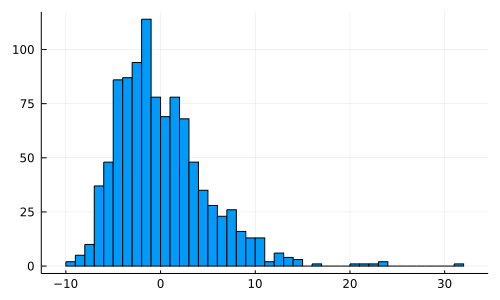

In [75]:
n = 30
theta = 3.0
reps = 1000
results = zeros(reps)
W = I(2)
for i = 1:reps
    y = rand(Chisq(theta), n)
    obj = theta -> ([theta.-mean(y); theta.-0.5*var(y)]'W*[theta.-mean(y); theta.-0.5*var(y)]) 
    thetahat, junk, junk = fminunc(obj, [3.0])
    results[i] = sqrt(n)*(thetahat[1]-theta)
end    
histogram(results,nbins=50,legend=false)
plot!(size=(500,300))

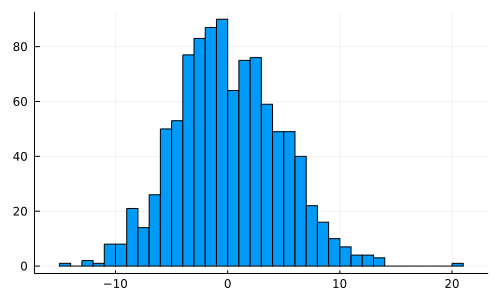

In [74]:
n = 10000
theta = 3.0
reps = 1000
results = zeros(reps)
W = I(2)
for i = 1:reps
    y = rand(Chisq(theta), n)
    obj = theta -> ([theta.-mean(y); theta.-0.5*var(y)]'W*[theta.-mean(y); theta.-0.5*var(y)]) 
    thetahat, junk, junk = fminunc(obj, [3.0])
    results[i] = sqrt(n)*(thetahat[1]-theta)
end    
histogram(results,nbins=50,legend=false)
plot!(size=(500,300))

### Choosing the Weighting Matrix

$W$ is a \textit{weighting matrix,} which determines the relative
importance of violations of the individual moment conditions. For
example, if we are much more sure of the first moment condition, which
is based upon the variance, than of the second, which is based upon
the fourth moment, we could set 
$$
W=\left[\begin{array}{cc}
a & 0\\
0 & b
\end{array}\right]
$$
 with $a$ much larger than $b.$ In this case, errors in the second
moment condition have less weight in the objective function.

How to estimate efficient GMM estimator?
### Two Step GMM estimator


The most common way to do efficient GMM estimation is the two step
GMM estimator:
1. Set the weight matrix to some positive definite matrix. Most commonly,
one uses an identity matrix of order $g.$ Obtain the GMM estimator
that minimizes $Q_{n}(\theta)=m_{n}(\theta)^{\prime}Wm_{n}(\theta)$
2. Based on this initial estimate, $\hat{\theta}$, say, compute the
moment contributions $m_{t}(\hat{\theta}),\,t=1,2,...,n$. Compute
an estimate of $\Omega_{\infty}$ based on the moment contributions,
say $\hat{\Omega}^{-1}$. The exact way to do this will depend upon
the assumptions of the model. Given the
estimate, compute the efficient GMM estimator which minimizes
$$
Q_{n}(\theta)=m_{n}(\theta)^{\prime}\hat{\Omega}^{-1}m_{n}(\theta).
$$
Note that $\hat{\Omega}^{-1}$ is fixed while numeric minimization
finds the second step estimator. The result is the two step estimator.

In [60]:
function gmm(moments, theta, weight)
    # average moments
    m = theta -> vec(mean(moments(theta),dims=1)) # 1Xg
    # moment contributions
    momentcontrib = theta -> moments(theta) # nXg
    # GMM criterion
    obj = theta -> ((m(theta))'weight*m(theta))
    # do minimization
    thetahat, objvalue, converged = fminunc(obj, theta)
    # derivative of average moments
    D = (ForwardDiff.jacobian(m, vec(thetahat)))' 
    # moment contributions at estimate
    ms = momentcontrib(thetahat)
    return thetahat, objvalue, D, ms, converged
end


gmm (generic function with 1 method)

In [73]:
n = 30
theta = 3.0
reps = 1000
results = zeros(reps,2)
for i = 1:1000
    y = rand(Chisq(theta), n)
    moments = theta -> [theta.-y  theta.-0.5.*(y .- mean(y)).^2.0]
    thetahat, junk, junk, ms, junk = gmm(moments, [3.0], I(2))
    results[i,1] = sqrt(n)*(thetahat[1]-theta)
    W = inv(cov(ms))
    thetahat, junk, ms, junk = gmm(moments, thetahat, W)
    results[i,2] = sqrt(n)*(thetahat[1]-theta)
end    

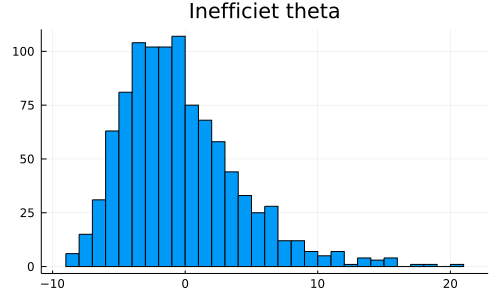

In [72]:
histogram(results[:,1],legend=false,title="Inefficiet theta")
plot!(size=(500,300))

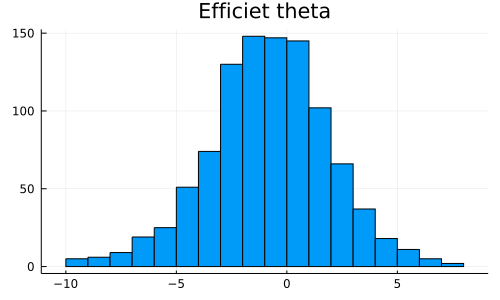

In [71]:
histogram(results[:,2],legend=false,title="Efficiet theta")
plot!(size=(500,300))

### Continuously Updated GMM Estimator (CUE)
The continuously updated estimator solves a minimization problem where the efficient weight matrix is
estimated at each iteration of the numeric optimization process. The
CUE estimator solves the minimization problem 
$$
Q_{n}(\theta)=m_{n}(\theta)^{\prime}\hat{\Omega}(\theta)^{-1}m_{n}(\theta).
$$

- Note that the covariance of the moment conditions will be updated
at each trial value of the objective function during the course of
minimization. 
- This estimator is equivalent to an iterated version of the two step
estimator. 
- The CUE estimator can be shown to have a smaller bias than does the
two step estimator, which may have a large small sample bias. 


### Generalized instrumental variables estimator for linear models
The IV estimator may appear a bit unusual at first, but it will grow
on you over time. 

Let's look at the previous section's results in more detail, for the
commonly encountered special case of a linear model with iid errors,
but with correlation between regressors and errors: 
$$
\begin{eqnarray*}
y_{t} & = & x_{t}^{\prime}\theta+\varepsilon_{t}\\
\mathcal{E}(x_{t}\varepsilon_{t}) & \neq & 0
\end{eqnarray*}
$$

- Let's assume, just to keep things simple, that the errors are iid
- The model in matrix form is $y=X\theta+\epsilon$

We have seen some cases where this problem arises:
- measurement error of regressors
- lagged dependent variable and autocorrelated errors
- simultaneous equations



Let $K=dim(x_{t}).$ Consider some vector $z_{t}$ of dimension
$G\times1$, where $G\ge K.$ Assume that $E(z_{t}\epsilon_{t})=0.$
The variables $z_{t}$ are **instrumental variables**.

Consider the moment conditions
$$
\begin{align*}
m_{t}(\theta) & =z_{t}\epsilon_{t}\\
 & =z_{t}\left(y_{t}-x_{t}^{\prime}\theta\right)
\end{align*}
$$

We can arrange the instruments in the $n\times G$ matrix
$$
\begin{eqnarray*}
Z & = & \left[\begin{array}{c}
z_{1}^{\prime}\\
z_{2}^{\prime}\\
\vdots\\
z_{n}^{\prime}
\end{array}\right]
\end{eqnarray*}
$$

The average moment conditions are
$$
\begin{align*}
\bar{m}_{n}(\theta) & =\frac{1}{n}Z^{\prime}\epsilon\\
 & =\frac{1}{n}(Z^{\prime}y-Z^{\prime}X\theta)
\end{align*}
$$

- The **generalized instrumental variables** estimator is just the
GMM estimator based upon these moment conditions. 
- When $G=K$, we have exact identification, and it is referred to as
the instrumental variables estimator. 
- Given the form of the moment conditions, the general formulae for
GMM lead to particular forms for the GIV estimator:

The first order conditions for GMM are $D_{n}W_{n}\bar{m}_{n}(\hat{\theta})=0$,
which imply that 
$$
D_{n}W_{n}Z^{\prime}X\hat{\theta}_{IV}=D_{n}W_{n}Z^{\prime}y
$$
where  $D_{n}=-\frac{X^{\prime}Z}{n}$ and $W_{n}=\left(\frac{Z^{\prime}Z}{n}\right)^{-1}$.

$$
D_{n}W_{n}Z^{\prime}X\hat{\theta}_{IV}=D_{n}W_{n}Z^{\prime}y
$$
becomes
$$
\frac{X^{\prime}Z}{n}\left(\frac{Z^{\prime}Z}{n}\right)^{-1}Z^{\prime}X\hat{\theta}_{IV}=\frac{X^{\prime}Z}{n}\left(\frac{Z^{\prime}Z}{n}\right)^{-1}Z^{\prime}y
$$
Noting that the powers of $n$ cancel, we get
$$
X^{\prime}Z\left(Z^{\prime}Z\right)^{-1}Z^{\prime}X\hat{\theta}_{IV}=X^{\prime}Z\left(Z^{\prime}Z\right)^{-1}Z^{\prime}y
$$
or
$$
\begin{equation}
\hat{\theta}_{IV}=\left(X^{\prime}Z\left(Z^{\prime}Z\right)^{-1}Z^{\prime}X\right)^{-1}X^{\prime}Z\left(Z^{\prime}Z\right)^{-1}Z^{\prime}y\label{eq:GIV estimator}
\end{equation}
$$

As an exercise, you can verify GIV estimator is
1. Consistent and 
2. Asymptotically normally distributed

### Example (GIV)

Suppose the model
is 
$$
\begin{eqnarray*}
y_{t}^{*} & = & \alpha+\rho y_{t-1}^{*}+\beta x_{t}+\epsilon_{t}\\
y_{t} & = & y_{t}^{*}+\upsilon_{t}
\end{eqnarray*}
$$
where $\epsilon_{t}$ and $\upsilon_{t}$ are independent Gaussian
white noise errors. Suppose that $y_{t}^{*}$ is not observed, and
instead we observe $y_{t}$. If we estimate the equation 
$$
y_{t}=\alpha+\rho y_{t-1}+\beta x_{t}+\nu_{t}
$$
this the estimator is biased and inconsistent. 

What about using the GIV
estimator? 

Consider using as instruments $Z=\left[1\,x_{t}\,x_{t-1}\,x_{t-2}\right]$.
The lags of $x_{t}$ are correlated with $y_{t-1}$ as long as $\beta$
is different from zero, and by assumption $x_{t}$ and its lags are
uncorrelated with $\epsilon_{t}$ and $\upsilon_{t}$ (and thus they're
also uncorrelated with $\nu_{t})$. Thus, these are legitimate instruments.
As we have 4 instruments and 3 parameters, this is an overidentified
situation. 

In [97]:
function  lags(x::Array{Float64,2},p)
	n, k = size(x)
	lagged_x = zeros(eltype(x),n,p*k)
	for i = 1:p
		lagged_x[:,i*k-k+1:i*k] = lag(x,i)
	end
    return lagged_x
end	

function  lags(x::Array{Float64,1},p)
	n = size(x,1)
	lagged_x = zeros(eltype(x), n,p)
	for i = 1:p
		lagged_x[:,i] = lag(x,i)
	end
    return lagged_x
end

lags (generic function with 2 methods)

In [98]:
function lag(x::Array{Float64,2},p::Int64)
	n,k = size(x)
	lagged_x = [ones(p,k); x[1:n-p,:]]
end

function lag(x::Array{Float64,1},p::Int64)
	n = size(x,1)
	lagged_x = [ones(p); x[1:n-p]]
end	 


lag (generic function with 2 methods)

In [107]:
function GIVmoments(theta, data)
	data = [data lags(data,2)]
    data = data[3:end,:] # get rid of missings
	n = size(data,1)
	y = data[:,1]
	ylag = data[:,2]
	x = data[:,3]
	xlag = data[:,6]
	xlag2 = data[:,9]
	X = [ones(n,1) ylag x]
	e = y - X*theta
	Z = [ones(n,1) x xlag xlag2]
	m = e.*Z
end
	

# do the Monte Carlo
n = 100
sig = 1
reps = 1000
results = zeros(reps,3)
for rep = 1:reps
	x = randn(n) # an exogenous regressor
	e = randn(n) # the error term
	ystar = zeros(n)
	# generate the dep var
	for t = 2:n
	  ystar[t] = 0.0 + 0.9*ystar[t-1] + 1.0*x[t] + e[t]
	end
    # add measurement error
	y = ystar + sig*randn(n)
	# now do GMM, using the data with meas. error in both dep. var. and regressor
	ylag = lag(y,1)
	data = [y ylag x];
    data = data[2:end,:] # drop first obs, missing due to lag
	theta = [0, 0.9, 1]
	weight = 1
    # note to self: this is very slow, because it uses the general GMM method, instead of analytic GIV
    # also, the weight matrix is not optimal
    moments = theta-> GIVmoments(theta, data)
	b, junk, junk, junk, junk = gmm(moments, theta, weight)
	b = b - [0.0, 0.9, 1.0] # subtract true values, so mean should be approx. zero if consistent
    results[rep,:] = b
end



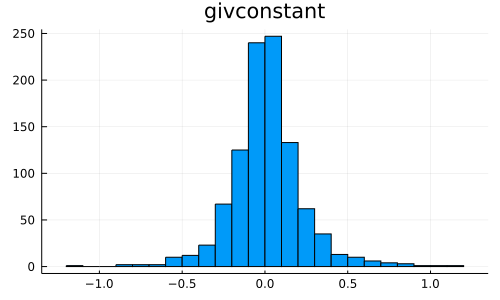

In [110]:
histogram(results[:,1],nbins = 30,title="givconstant",legend=false)
plot!(size=(500,300))

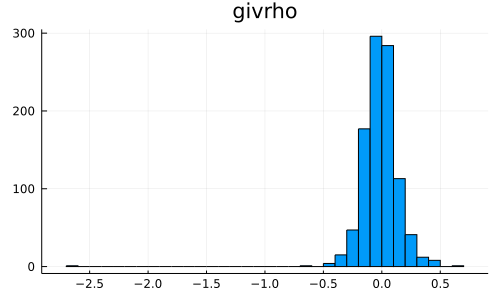

In [111]:
histogram(results[:,2],nbins = 30,title="givrho",legend=false)
plot!(size=(500,300))

In [132]:
mean(results,dims=1)

1×3 Array{Float64,2}:
 0.0109426  -0.0147212  -0.00368917

In [133]:
std(results,dims=1)

1×3 Array{Float64,2}:
 0.217792  0.161476  0.190097